### Importing libraries

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import geopandas as gpd
import numpy as np

### Fetching data

The data for this project was obtained through [the official portal](https://datos.gov.co "datos.gov.co") where all public entities upload their data in concordance with the article 5 of Law 1712 of 2014.

The data can be obtained as a csv or connecting directly with the Socrata API, both options are equally good for this scenario, but since I'm a particularly lazy individual I'll just go with the csv for the time being.

Please don't be like me.

In [2]:
df = pd.read_csv("Dataset/Casas_de_la_Cultura_y_Bibliotecas.csv")
df

,Tipo,DIRECTOR/A,CORREOS ELECTRONICOS,TELEFONO FIJO,DIRECCIÓN,MUNICIPIO
0,Biblioteca Publica,Víctor Olmos Acosta,volmos@comfamiliar.edu.co,3373127 Ext 2909,Guayacanes Ciudela Cuba,Pereira
1,Biblioteca Publica,Wilson Florez Valencia,wflorez@comfamiliar.edu.co,3135600 Ext 2453 3135638,Comfamiliar Risaralda Cra 5 21- 48 Piso 2,Pereira
2,Biblioteca Publica,Leidy Yohanna Echavarría,lechavarria@comfamiliar.edu.co,3684219,Calle 15 Cra 8 Avenida de la Caña Casa de la ...,La Virginia
3,Biblioteca Publica,Lina Margarita Quiroz Quintero,lquiroz@comfamiliar.edu.co,3609375,Cra 7 Calle 8 Casa de la Cultura,Apia
4,Biblioteca Publica,Adriana María Grisales Franco,agrisales@comfamiliar.edu.co,3686537,Calle 9 Cra 9 Casa de la Cultura,Marsella
...,...,...,...,...,...,...
69,Representante de talleres de lectura y escritu...,Nancy Yanet Montoya Hoyos,nancymontoyaphotomatrix@gmail.com,3177266659,"Lectura, escritura, oralidad y biblioteca",Pereira
70,Representante de universidades o bibliotecas p...,José Gildardo Pineda Orozco,jpinedaeni@gmail.com,3164933937,"Lectura, escritura, oralidad y biblioteca",Dosquebradas
71,Representante de las entidades privadas u ONGS...,José Vicente Villegas Jaramillo,vigiaspatrimonioculturalsrc@gmail.com,3106531529,Patrimonio,Santa Rosa de Cabal
72,Representante de comunidades indígenas de Risa...,Luis Hernando Queragama Guatiqui,hernandoqueragama@hotmail.com,3195132073,Patrimonio,Pueblo Rico


Aha! 74 rows!

That's a bit underwhelming not gonna lie.

But before we move further I feel like it'd be good to explain what this dataset is: This is the information of all libraries and cultural centres in Risaralda (the state where yours truly lives). Considering there are 14 municipalities, I'd say that even if the number is kind of small in the great order of things, is not too shaby.

But I digress; so let´s continue with the next step:

### Why in the world am I doing this?

I was just thinking to myself: Where I live there are around 4 libraries and one cultural center, I wonder how is it in a more regional level?.

Then I happened to stumble across this dataset, and then I said to myself: "Wow! Isn't that convenient?"

And here we are.

No, but seriously, let's perform some initial EDA:


### Exploratory Data Analysis

Do we have null values in any of our columns?

In [3]:
df.isnull().sum()

Tipo                    0
DIRECTOR/A              0
CORREOS ELECTRONICOS    0
TELEFONO FIJO           0
DIRECCIÓN               0
MUNICIPIO               0
dtype: int64

Nice!

Now let's see the type of our data, just in case there is some anomaly we don't know of just yet

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74 entries, 0 to 73
Data columns (total 6 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Tipo                  74 non-null     object
 1   DIRECTOR/A            74 non-null     object
 2   CORREOS ELECTRONICOS  74 non-null     object
 3   TELEFONO FIJO         74 non-null     object
 4   DIRECCIÓN             74 non-null     object
 5   MUNICIPIO             74 non-null     object
dtypes: object(6)
memory usage: 3.6+ KB


Well, all looks good; now we have do the cool thingie that allows data analytics as a whole to exist, and that incidentally makes me love analytics:

### Asking ourselves questions

<figure>
<img src="Pictures/BigQuestions.png" style="width:100%">
<figcaption><center> "It’s time for you to look inward and begin asking yourself the big questions" </center> </figcaption>
</figure>

For example: 

## How many cultural centers are in each town? 

In [5]:
cc_count = df["MUNICIPIO"].value_counts()
cc_count

Pereira                32
Dosquebradas           11
Santa Rosa de Cabal     5
La Virginia             3
Santuario               3
La Celia                3
Pueblo Rico             3
Apia                    2
Marsella                2
Guática                 2
Balboa                  2
Mistrató                2
Quinchía                2
Belén de Umbría         1
Santa Cecilia           1
Name: MUNICIPIO, dtype: int64

Now, let´s see this in a graph.

But before that, if you've been paying attention you've realized something weird (if not, there is no problem, this is just my excuse to clarify it nevertheless). "I thought you said Risaralda had 14 municipalities, then how comes there are **15** MUNICIPIOs? Why would you lie to me like that?"

Valid question. The thing is, there **are** 14 municipalities, but Santa Cecilia is a township; which means it's technically not municipalities, but still they have at least one library or cultural center, so that's why they appear with the others.

Well, with that sorted out, let's see this in a graph:

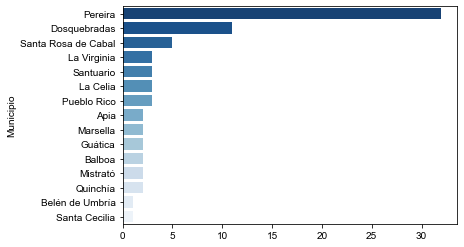

In [6]:
gph = sns.countplot(
                    #In the count plot we show the column MUNICIPIO
                    y='MUNICIPIO', 
    
                    #From our DataFrame df
                    data=df,
    
                    #With this color palette
                    palette="Blues_r",
    
                    #Sorted 
                    order=cc_count.index
                   )

#Changing the axis labels
gph.set(xlabel=None) 
gph.set(ylabel="Municipio")

#Adding a grid to the chart
sns.set_theme(style="whitegrid")
plt.show()

And now the info we just saw is way clearer in the form of this chart. As we can see there is an abismal difference between Pereira (the capital) and the other towns. This can be occasioned by diverse factors, for example: 

Being a capital city means there is a lot more resources to invest into culture.

The city lifestyle facilitates the creation of spaces for cultural enrichment.

Linked with the first one: There are more cultural enrichment initiatives born in the capital than in other towns, which is reflected in a bigger ammount of cultural centers.

But for now, let's focus on showing the data.

Another question that may arise is: 

### All of those are really just libraries and culture centers?

In [7]:
cc_count2 = df["Tipo"].value_counts()
cc_count2

Biblioteca Publica                                                                                                                                                                                               16
Casa de la Cultura                                                                                                                                                                                               13
Representante de los artistas de teatro en alguna de las diferentes modalidades (teatro de sala, teatro de calle, teatro de autor, teatro infantil, pantomima, títeres, clow, narrador escénico, performance)     5
Representante de los artistas de circo                                                                                                                                                                            2
Representante de comunidades indígenas de Risaralda                                                                                                     

And the answer is: **No.**

What can we do? If we just plot this as is, the graph will be really funny:

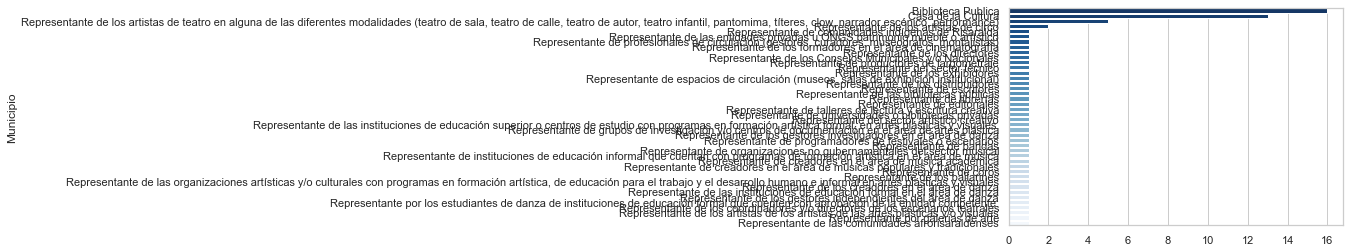

In [8]:
gph = sns.countplot(
                    #In the count plot we show the column Tipo
                    y='Tipo', 
    
                    #From our DataFrame df
                    data=df,
    
                    #With this color palette
                    palette="Blues_r",
    
                    #Sorted 
                    order=cc_count2.index
                   )

#Changing the axis labels
gph.set(xlabel=None) 
gph.set(ylabel="Municipio")

#Adding a grid to the chart
sns.set_theme(style="whitegrid")
plt.show()

Yeah, figures.

But looking at the information we see that the other types are all Representatives of some kind: "Representative of the Afro-Risaralda communities", "Representative of artists in the plastic and/or visual arts", "Representative of dancers", the works.

So, let's pull a sneaky one and transform the data so it´s clearer, shall we:


In [9]:
df1 = df
df1.loc[df.apply(lambda df1: "Representante" in df1['Tipo'], axis=1), 'Tipo'] = "Representante"
#df[df.apply(lambda df: "Representante" in df['Tipo'], axis=1)]
cc_count3 = df1["Tipo"].value_counts()
cc_count3

Representante         45
Biblioteca Publica    16
Casa de la Cultura    13
Name: Tipo, dtype: int64

Now that's more like it! Now we can show this information in a plot to get a broader context

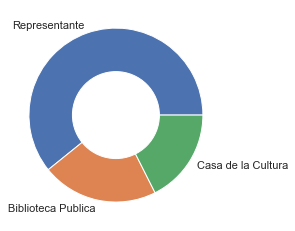

In [10]:
gph = df1["Tipo"].value_counts().plot(kind='pie')

#A pie chart! I hate pie charts

#So let's tear down a hole in it, shall we?
circle = plt.Circle( (0,0), 0.5, color='white')
p=plt.gcf()
p.gca().add_artist(circle)
gph.set(ylabel=None) 
plt.show()

While good looking, it is kinda vague, because there are a lot of representatives that fit into the same cathegory, so it would be a good idea to group them:

In [11]:
cc_count4 = df1["DIRECCIÓN"].value_counts()
cc_count4

Teatro                                                         8
Cinematografía                                                 8
Música                                                         7
Artes plásticas y visuales                                     7
Lectura, escritura, oralidad y biblioteca                      6
Danza                                                          6
Patrimonio                                                     3
Casa de la Cultura                                             2
Calle 3  2-08                                                  2
calle 7  # 4 -25                                               1
Plaza principal Casa de la Cultura                             1
Cra 5 #  5-31  Mistrato Risaralda                              1
Cra 16 36-44 Alcaldia Municipal                                1
parque principal guatica calle 8 #6-20                         1
carrera 7  calle 8 esquina                                     1
Cra 4  6-17 Pueblo Rico-R

In [12]:
df1[(df1['Tipo'] == "Representante")]

,Tipo,DIRECTOR/A,CORREOS ELECTRONICOS,TELEFONO FIJO,DIRECCIÓN,MUNICIPIO
29,Representante,John Heider Zapata,Bandajhonblack@gmail.com,3155845005,Música,Dosquebradas
30,Representante,Richard Alejandro Cardona Tapasco,alejocar04@gmail.com,3192268568,Música,Dosquebradas
31,Representante,Juan Carlos Castrillón Agudelo,juancarloscastrillonproductor@gmail.com,3105044450,Música,Pereira
32,Representante,Daniela Ospina Acosta,danielaospinaacosta@gmail.com,3127024673,Música,Pereira
33,Representante,LAURA MARIN VALENCIA,coordinacioncuerdasp@gmail.com,3173314924,Música,Pereira
34,Representante,ÁNGEL LIBANIEL GARCÍA PINEDA,angelgarciap@hotmail.com,3207336965,Música,Dosquebradas
35,Representante,OLGA BEATRIZ ZAMORA BLANDÓN,olgabeatriz14@hotmail.com,3217706505,Música,Dosquebradas
36,Representante,Henry Alberto Calderon Vargas,artedampereira@gmail.com,3167018343,Danza,Pereira
37,Representante,RAFAEL OCTAVIO HERNANDEZ MELO,rafaelohm@hotmail.com,3113065558,Danza,Santa Rosa de Cabal
38,Representante,RODOLFO ROMAN RAMIREZ,rodolforoman581@gmail.com,3195799328,Danza,Santuario


In [13]:
#Assigning DIRECCIÓN to Tipo in the case of Representante
df1.loc[df.apply(lambda df1: "Representante" in df1['Tipo'], axis=1), 'Tipo'] = 'Representante de '+ df1['DIRECCIÓN']
#df[df.apply(lambda df: "Representante" in df['Tipo'], axis=1)]
cc_count3 = df1["Tipo"].value_counts()
cc_count3

Biblioteca Publica                                            16
Casa de la Cultura                                            13
Representante de Teatro                                        8
Representante de Cinematografía                                8
Representante de Música                                        7
Representante de Artes plásticas y visuales                    7
Representante de Danza                                         6
Representante de Lectura, escritura, oralidad y biblioteca     6
Representante de Patrimonio                                    3
Name: Tipo, dtype: int64

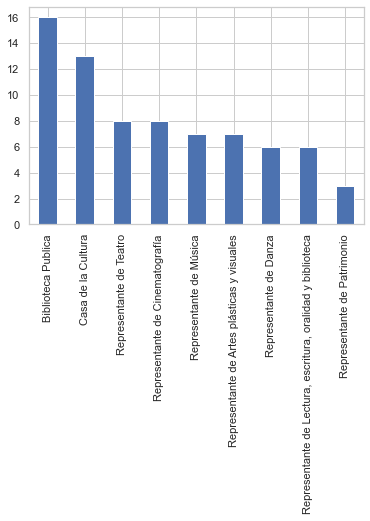

In [15]:
gph = df1["Tipo"].value_counts().plot(kind='bar')

In [16]:
df1 = df1.drop('DIRECTOR/A', axis=1)
df1

,Tipo,CORREOS ELECTRONICOS,TELEFONO FIJO,DIRECCIÓN,MUNICIPIO
0,Biblioteca Publica,volmos@comfamiliar.edu.co,3373127 Ext 2909,Guayacanes Ciudela Cuba,Pereira
1,Biblioteca Publica,wflorez@comfamiliar.edu.co,3135600 Ext 2453 3135638,Comfamiliar Risaralda Cra 5 21- 48 Piso 2,Pereira
2,Biblioteca Publica,lechavarria@comfamiliar.edu.co,3684219,Calle 15 Cra 8 Avenida de la Caña Casa de la ...,La Virginia
3,Biblioteca Publica,lquiroz@comfamiliar.edu.co,3609375,Cra 7 Calle 8 Casa de la Cultura,Apia
4,Biblioteca Publica,agrisales@comfamiliar.edu.co,3686537,Calle 9 Cra 9 Casa de la Cultura,Marsella
...,...,...,...,...,...
69,"Representante de Lectura, escritura, oralidad ...",nancymontoyaphotomatrix@gmail.com,3177266659,"Lectura, escritura, oralidad y biblioteca",Pereira
70,"Representante de Lectura, escritura, oralidad ...",jpinedaeni@gmail.com,3164933937,"Lectura, escritura, oralidad y biblioteca",Dosquebradas
71,Representante de Patrimonio,vigiaspatrimonioculturalsrc@gmail.com,3106531529,Patrimonio,Santa Rosa de Cabal
72,Representante de Patrimonio,hernandoqueragama@hotmail.com,3195132073,Patrimonio,Pueblo Rico


In [17]:
df1.loc[df["MUNICIPIO"] == "Santa Cecilia", "MUNICIPIO"] = 'Quinchía'

In [18]:
df1_agrupado=df1.groupby("MUNICIPIO")["Tipo"].agg(['count'])
df1_agrupado

,count
MUNICIPIO,
Apia,2
Balboa,2
Belén de Umbría,1
Dosquebradas,11
Guática,2
La Celia,3
La Virginia,3
Marsella,2
Mistrató,2


In [19]:
import os

os.environ['GDAL_DATA'] = r'C:\Users\Equipo\.conda\envs\py3-TF2.0\Library\share\gdal'

In [19]:
municipios=gpd.read_file(r'zip://C:\Users\Equipo\Desktop\Projects\CentrosCulturales\COL_Municipio.zip')
municipios

,ID,TOTPOP_CY,Shape__Are,Shape__Len,cod_dane,geometry
0,05001,2559097,3.798647e+08,1.072579e+05,05001000,"POLYGON ((-8423087.868 710530.773, -8423036.11..."
1,05002,20493,5.155810e+08,1.282157e+05,05002000,"POLYGON ((-8400992.107 663049.702, -8400902.90..."
2,05004,2763,2.935562e+08,8.885140e+04,05004000,"POLYGON ((-8469712.412 753218.991, -8469679.34..."
3,05021,4746,1.294922e+08,7.572552e+04,05021000,"POLYGON ((-8352494.010 715689.897, -8352304.86..."
4,05030,31600,8.456353e+07,5.066772e+04,05030000,"POLYGON ((-8425665.892 679202.380, -8425597.03..."
...,...,...,...,...,...,...
1117,97889,1108,4.669929e+09,4.292950e+05,97889000,"POLYGON ((-7759205.373 123549.666, -7759311.32..."
1118,99001,20500,1.234376e+10,6.149489e+05,99001000,"POLYGON ((-7546884.015 705017.769, -7546632.27..."
1119,99524,9705,1.844082e+10,8.362720e+05,99524000,"POLYGON ((-7684507.959 690786.085, -7684118.07..."
1120,99624,4235,3.992354e+09,3.642825e+05,99624000,"POLYGON ((-7866588.235 600460.855, -7866405.66..."


<AxesSubplot:>

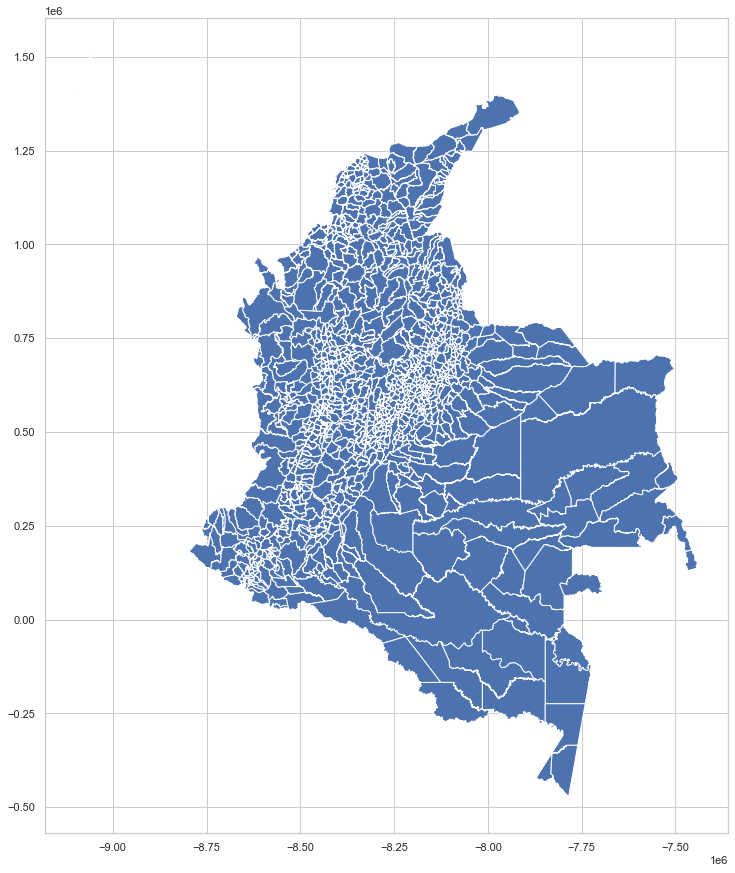

In [20]:
municipios.plot(figsize = (25,15))

In [21]:
# initialize list of lists
data = [['Dosquebradas', '66170000'], ['La Virginia', '66400000'], ['Marsella', '66440000'], ['Pereira', '66001000'], 
        ['Santa Rosa de Cabal', '66682000'], ['Apia', '66045000'], ['Balboa', '66075000'], ['Belén de Umbría', '66088000'],
        ['Guática', '66318000'], ['La Celia', '66383000'], ['Quinchía', '66594000'], ['Santuario', '66687000'], 
        ['Mistrató', '66456000'], ['Pueblo Rico', '66572000']]


# Create the pandas DataFrame
cdane_risaralda= pd.DataFrame(data, columns=['MUNICIPIO', 'Cod_Dane'])

In [22]:
cdane_risaralda

,MUNICIPIO,Cod_Dane
0,Dosquebradas,66170000
1,La Virginia,66400000
2,Marsella,66440000
3,Pereira,66001000
4,Santa Rosa de Cabal,66682000
5,Apia,66045000
6,Balboa,66075000
7,Belén de Umbría,66088000
8,Guática,66318000
9,La Celia,66383000


In [23]:
mun_cod=pd.merge(df1_agrupado, cdane_risaralda, on="MUNICIPIO", how="left")
mun_cod=mun_cod.set_index('Cod_Dane')
mun_cod=mun_cod.drop(['MUNICIPIO'], axis=1)
mun_cod=mun_cod.rename(columns={"count": "Cuenta"})
mun_cod

,Cuenta
Cod_Dane,
66045000,2
66075000,2
66088000,1
66170000,11
66318000,2
66383000,3
66400000,3
66440000,2
66456000,2


In [24]:
datos_risaralda =  municipios.merge(mun_cod, left_on="cod_dane", right_on="Cod_Dane")
datos_risaralda

,ID,TOTPOP_CY,Shape__Are,Shape__Len,cod_dane,geometry,Cuenta
0,66001,481861,6.171957e+08,222606.084487,66001000,"POLYGON ((-8439710.188 546826.962, -8439609.76...",32
1,66045,12345,1.571425e+08,87100.519311,66045000,"POLYGON ((-8452306.881 582317.177, -8452327.33...",2
2,66075,6361,1.218004e+08,55189.123986,66075000,"POLYGON ((-8454061.034 556139.915, -8454051.65...",2
3,66088,24958,1.818429e+08,65632.481740,66088000,"POLYGON ((-8445513.096 587877.106, -8445505.31...",1
4,66170,226050,6.915657e+07,39289.216438,66170000,"POLYGON ((-8425517.253 544434.226, -8425513.61...",11
5,66318,12233,9.398020e+07,58608.475612,66318000,"POLYGON ((-8433523.088 600609.095, -8433496.65...",2
6,66383,7501,9.170088e+07,55526.622925,66383000,"POLYGON ((-8466980.164 560758.417, -8466959.79...",3
7,66400,28265,3.533577e+07,29292.690157,66400000,"POLYGON ((-8444720.683 549982.440, -8444684.20...",3
8,66440,16885,1.503819e+08,68209.926608,66440000,"POLYGON ((-8431650.489 561475.052, -8431604.56...",2
9,66456,17432,6.510526e+08,146422.446395,66456000,"POLYGON ((-8459908.968 616697.101, -8459737.50...",2


In [25]:
analisis_cc = datos_risaralda.sort_values(by = 'Cuenta', ascending = False)

<AxesSubplot:>

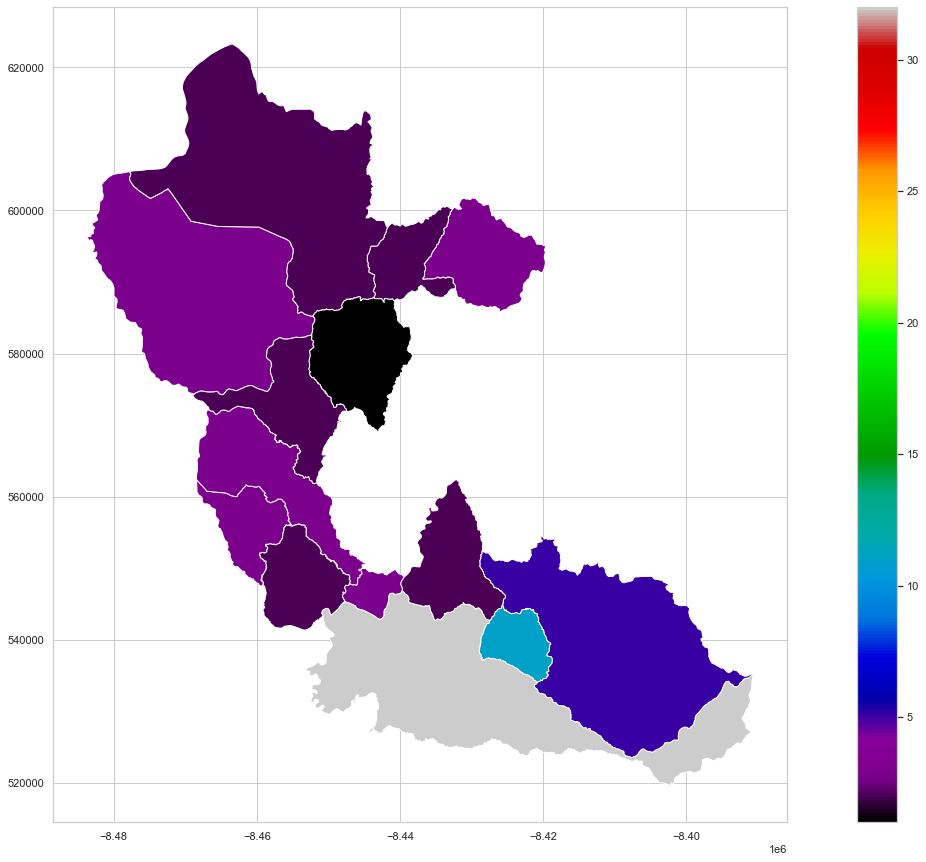

In [26]:
analisis_cc.plot(column='Cuenta', legend=True, figsize=(25,15), cmap='nipy_spectral')